# Optimización - Laboratorio 12

### Isabella Salgado 201730418
### Juan Pablo Naranjo 201730006

## Librerías para el laboratorio

In [314]:
import numpy as np
from numpy import inf
from numpy import linalg as LA
import sympy as sym
from sympy import *
from scipy.optimize import linprog
from scipy.optimize import minimize
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import random
import numdifftools as nd

## Punto 1

A continuación se presenta la implementación del algoritmo de gradiente descendiente proyectado:

In [390]:
# Las siguientes funciones sirven para realizar la operación de proyección de un punto cualquiera en R2 a una recta
# sobre la cual yacen los puntos A y B. La función proy es para una función de dos variables mientras que la función
# proy1D es para una función de una variable.

def proy(A, B, x):
    return A + ((np.dot((x-A).transpose(), (B-A)))/(np.dot((B-A).transpose(), (B-A))))*(B-A)

def proy1D(A, B, x, f):
    xvec = np.array([[x],[f(x)]])
    return A + ((np.dot((xvec-A).transpose(), (B-A)))/(np.dot((B-A).transpose(), (B-A))))*(B-A)

In [355]:
def descenso_grad_proy(tol, x0, a, f, Nmax):
    # Entradas
    # tol: tolerancia del algoritmo, valor mínimo que debe haber de distancia entre x(k+1) y x(k) para parar de iterar.
    # x0: condición incial, necesariamente ingresada como un vector columna.
    # a: alpha (magnitud de los saltos)
    # f: función a la que se le quiere aplicar el algoritmo
    # Nmax: número máximo de iteraciones
    
    # k representa la iteración actual.
    k = 0
    
    # dif es un parámetro que representará la distancia entre x(k+1) y x(k).
    dif = 1
    
    # Se crea una lista donde se irá guardando el valor actual de la iteración (k).
    its = []
    
    # Se crea una lista en donde se irá guardando el valor actual de x(k) en el caso de una función f de una dimensión.
    A1dim = []
    
    # Si la función f es de dimensión 2 o mayor, se aplica el siguiente código:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # Se crea una matriz en donde se irá guardando el valor actual de x(k). El número de columnas de A es el número
        # de variables del vector x(k).
        A = np.zeros((1,np.shape(x0)[0]))
        
        # La primera fila de la matriz corresponde al punto inicial.
        A[0,:] = x0.transpose()
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se agrega el valor actual de la iteración a la lista correspondiente.
            its.append(k)
            
            # Se calcula el gradiente de la función, evaluado en la iteración actual. El resultado de esta función es un 
            # vector fila.
            gradiente = nd.Gradient(f)(x0)
            
            # Se crea un gradiente auxiliar pero de tipo vector columna, para poderlo operar con la condición inicial.
            grad = np.zeros((np.size(gradiente),1))
            
            # Se va llenando el vector gradiente auxiliar con los valores del vector gradiente original. De esta forma,
            # ya se tiene el resultado del gradiente expresado como vector columna, tal como se requiere para poder 
            # hacer operaciones.
            for i in range(0,np.size(gradiente)):
                grad[i] = gradiente[i]
            
            # Se aplica la fórmula del gradiente descendiente.
            x = x0 - a*grad
            
            # Puntos sobre la recta que define la región factible
            punto1 = np.array([[0],[5.5]])
            punto2 = np.array([[7.33],[0]])
            
            # Si el nuevo punto quedó dentro de la región factible
            if x[1] >= (-3/4)*x[0] + 11/2:
                # Se transpone el x(k+1) para luego agregarlo a la matriz A.
                xaux = x.reshape((1, -1))
                A = np.append(A, xaux, axis=0)
            # Si el nuevo punto quedó fuera de la región factible
            elif x[1] < (-3/4)*x[0] + 11/2:
                # Se hace la operación de proyección para menterlo a la región factible.
                x = proy(punto1, punto2, x)
                # Se transpone el x(k+1) para luego agregarlo a la matriz A.
                xaux = x.reshape((1, -1))
                A = np.append(A, xaux, axis=0)
            
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
    
    # Si la función f es de una sola variable, se aplica el siguiente código:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            A = A1dim
            
            # Se agrega la condición inicial a la lista de valores actuales de x(k)
            A1dim.append(x0)
            
            # Se agrega el valor actual de la iteración a la lista correspondiente.
            its.append(k)
            
            # Se encuentra el valor del gradiente.
            gradiente = nd.Gradient(f)(x0)
            
            # Se aplica la fórmula del gradiente descendiente y se agrega el valor encontrado a la matriz A.
            x = x0 - a*gradiente
            
            # Puntos sobre la recta que define la región factible
            punto2 = np.array([[0],[5.5]])
            punto1 = np.array([[7.33],[0]])
            
            # Si el nuevo punto quedó dentro de la región factible
            if f(x) >= (-3/4)*x + 11/2:
                # Se agrega el valor nuevo a la lista de valores de x(k).
                A1dim.append(x)
            # Si el nuevo punto quedó fuera de la región factible
            elif f(x) < (-3/4)*x + 11/2:
                # Se realiza al proyección de una dimensión para meterlo a la región factible
                x = float(proy1D(punto1, punto2, x, f)[0])
                # Se agrega el valor nuevo a la lista de valores de x(k).
                A1dim.append(x)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
        
        
    # Salidas:
    # x: resultado final al que el algoritmo convergió cuando se cumplió la condición de parada, es decir, el mínimo.
    # A: Matriz en la que se encuentran todos los x(k) requeridos para llegar al x mínimo.
    # its: Número de iteraciones que tardó el algoritmo
        
    return x, A, its

Se aplica el algoritmo de gradiente descendiente a la función con los distintos valores de $\alpha$:

In [359]:
# Se define la función
def f(x):
    Q = np.array([[1,1/2],[1/2,2]])
    B = np.array([[1/2],[0]])
    return Q[0,0]*x[0]**2 + (Q[0,1]+Q[1,0])*x[0]*x[1] + Q[1,1]*x[1]**2 + B[0]*x[0] + B[1]*x[1]

# Se definen los distintos parámetros que el algoritmo necesita
alpha = [0.03, 0.1, 0.25, 0.6]
x0 = np.array([[10],[10]])
N = 10000
tol = 10**-6

# Lista para guardar las soluciones encontradas para cada alpha
sols = []

# Lista para guardar las matrices encontradas para cada alpha
matrices = []

# Lista apra guardar el número de iteraciones del algoritmo
iteraciones = []

# Se aplica el algoritmo iterativamente y se agrega la solución, la matriz y las iteraciones a la lista correspondiente.
for a in alpha:
    xsol, soluciones, ks = descenso_grad_proy(tol, x0, a, f, N)
    sols.append(xsol)
    matrices.append(soluciones)
    iteraciones.append(ks)

Se muestra la función en 3D

Text(0.5, 0, 'Z')

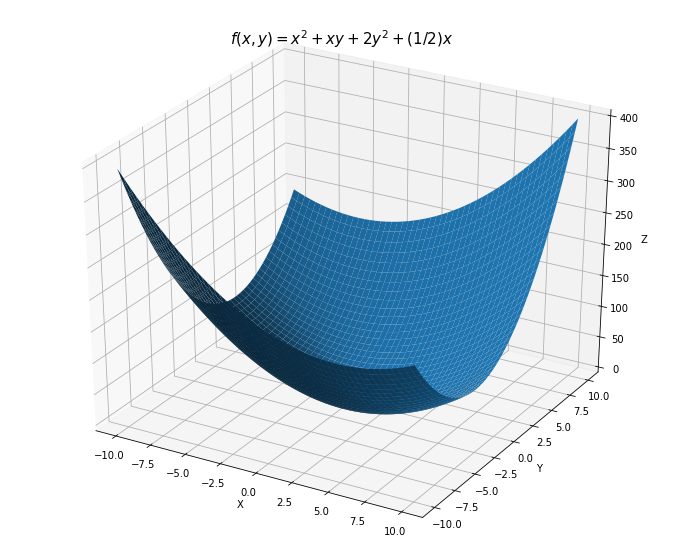

In [389]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-10, 10, 0.05)
X, Y = np.meshgrid(x, y)
# Función para graficar en R3.
Z = X**2 + X*Y + 2*Y**2 + (1/2)*X

ax.plot_surface(X, Y, Z)

ax.set_title("$f(x, y) = x^2 + xy + 2y^2 + (1/2)x$", fontsize="15")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [391]:
# Se aplica el algoritmo para todos los valores de alpha, para poder usar estos resultados al momento de graficar.
x1, sol1, its1 = descenso_grad_proy(tol, x0, alpha[0], f, N)
x2, sol2, its2 = descenso_grad_proy(tol, x0, alpha[1], f, N)
x3, sol3, its3 = descenso_grad_proy(tol, x0, alpha[2], f, N)
x4, sol4, its4 = descenso_grad_proy(tol, x0, alpha[3], f, N)

print(f'Punto inicial escogido: \n ({float(x0[0])}, {float(x0[1])})')

print(f'\nSolución con a = {alpha[0]}: ' + f'\n x = ({np.round(float(x1[0]), 5)}, {np.round(float(x1[1]), 5)})')
print(f'Número de iteraciones: {len(its1)}')

print(f'\nSolución con a = {alpha[1]}: ' + f'\n x = ({np.round(float(x2[0]), 5)}, {np.round(float(x2[1]), 5)})')
print(f'Número de iteraciones: {len(its2)}')

print(f'\nSolución con a = {alpha[2]}: ' + f'\n x = ({np.round(float(x3[0]), 5)}, {np.round(float(x3[1]), 5)})')
print(f'Número de iteraciones: {len(its3)}')

print(f'\nSolución con a = {alpha[3]}: ' + f'\n x = ({np.round(float(x4[0]), 5)}, {np.round(float(x4[1]), 5)})')
print(f'Número de iteraciones: {len(its4)}')

Punto inicial escogido: 
 (10.0, 10.0)

Solución con a = 0.03: 
 x = (3.81903, 2.63443)
Número de iteraciones: 209

Solución con a = 0.1: 
 x = (3.81902, 2.63443)
Número de iteraciones: 67

Solución con a = 0.25: 
 x = (3.81902, 2.63444)
Número de iteraciones: 26

Solución con a = 0.6: 
 x = (3.81902, 2.63444)
Número de iteraciones: 8


Se seleccionaron las condiciones de parada 

$||x(k+1) - x(k)|| < tol$

$k < N_{max}$

porque estas condiciones garantizan que la diferencia entre el valor de $x$ en la iteración $k$ y el valor de $x$ en la iteración $k+1$ es muy pequeña. Esto quiere decir que el valor $x(k)$ y el valor $x(k+1)$ son prácticamente el mismo. De igual forma, se usó la condición de parada $k < N_{max}$ para detener el algoritmo en casos extremos en que todavía no se ha conseguido la tolerancia adecuada y ya van bastantes iteraciones que pueden aumentar mucho el tiempo de cómputo y aumentar el peso computacional del programa.

## Punto 2

### a)
Se aplica el algoritmo de gradiente descendiente proyectado para diferentes valores de $\alpha$ y se grafica su trayectoria en las curvas de nivel:

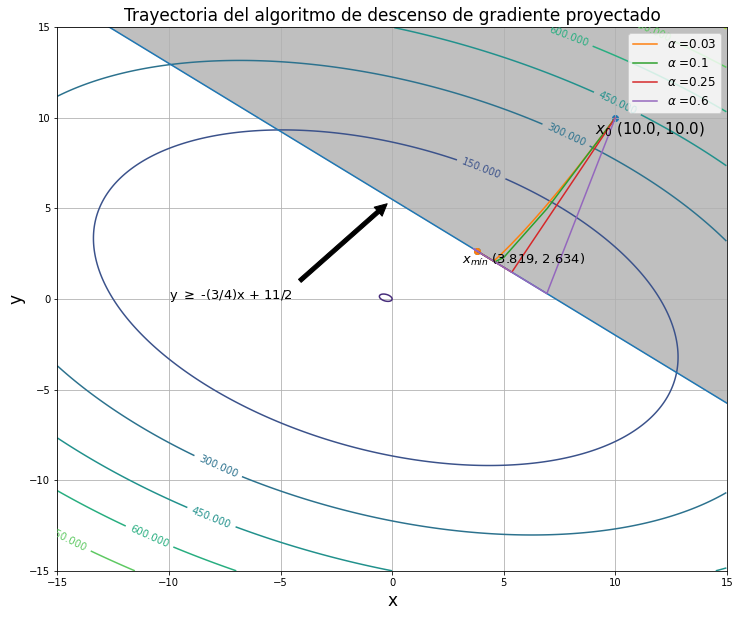

In [395]:
# Se construyen las curvas de contorno de la función f.
step = 0.025
x = np.arange(-15, 15, step)
y = np.arange(-15, 15, step)
    
X, Y = np.meshgrid(x, y)
Z = X**2 + X*Y + 2*Y**2 + (1/2)*X

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se construye la recta que define la región factible
x = np.linspace(-20, 20, 2000)
y1 = (-3/4)*x + 11/2

# Se grafica dicha recta
plt.plot(x, y1)
plt.xlim((-15, 15))
plt.ylim((-15, 15))

# Se sombrea la región factible
plt.fill_between(x, y2, np.max(y2), color='grey', alpha=0.5)

# Se grafican las trayectorias tomadas por el algoritmo para cada alpha correspondiente.
plt.plot(sol1[:,0], sol1[:,1], label = r'$\alpha$ =' + f'{alpha[0]}')
plt.plot(sol2[:,0], sol2[:,1], label = r'$\alpha$ =' + f'{alpha[1]}')
plt.plot(sol3[:,0], sol3[:,1], label = r'$\alpha$ =' + f'{alpha[2]}')
plt.plot(sol4[:,0], sol4[:,1], label = r'$\alpha$ =' + f'{alpha[3]}')

plt.annotate("$x_0$ " + f"({float(x0[0])}, {float(x0[1])})", x0-0.9, fontsize="15")
plt.annotate("$x_{mín}$" + f' ({np.round(float(x1[0]), 3)}, {np.round(float(x1[1]), 3)})', x1-0.7, fontsize="13")
plt.annotate(r'y $\geq$ -(3/4)x + 11/2', xy=(0, 11/2), xytext=(-10, 0),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize="13")

plt.scatter([x0[0], x1[0]], [x0[1], x1[1]])
plt.scatter(x2[0], x2[1])
plt.legend(fontsize="12")

ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente proyectado', fontsize="17")
ax.grid()
plt.show()

Información sobre cómo sombrear regiones en R2 se encontró [aquí](https://moonbooks.org/Articles/How-to-fill-an-area-in-matplotlib-/).

Información sobre cómo usar la función *annotate* se encontró [aquí](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html).

### b) 
Gráfica de $f(x_k)$ vs. $k$

In [375]:
# En cada una de estas listas se va a guardar el valor de la función f evaluada en cada iteración del algoritmo
valoresf1 = []
valoresf2 = []
valoresf3 = []
valoresf4 = []

# Se llena cada lista con su valor correspondiente 
for i in range(len(its1)):
    valoresf1.append(float(f(sol1[i])))
    
for i in range(len(its2)):
    valoresf2.append(float(f(sol2[i])))
    
for i in range(len(its3)):
    valoresf3.append(float(f(sol3[i])))

for i in range(len(its4)):
    valoresf4.append(float(f(sol4[i])))

Con $\alpha = 0.03$

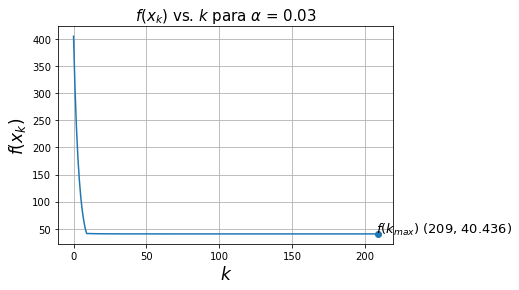

In [374]:
plt.plot(its1, valoresf1)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ para ' +  r'$\alpha$ = ' + f'{alpha[0]}',fontsize=15)
plt.scatter(len(its1), float(f(sol1[len(its1)])))
plt.annotate("$f(k_{max})$ " + f"({len(its1)}, {np.round(float(f(sol1[len(its1)])), 3)})", (len(its1)-1, f(sol1[len(its1)])+0.9), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()

Con $\alpha = 0.1$

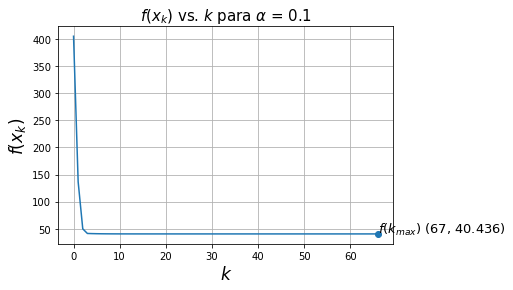

In [377]:
plt.plot(its2, valoresf2)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ para ' +  r'$\alpha$ = ' + f'{alpha[1]}',fontsize=15)
plt.scatter(len(its2)-1, float(f(sol2[len(its2)])))
plt.annotate("$f(k_{max})$ " + f"({len(its2)}, {np.round(float(f(sol2[len(its2)])), 3)})", (len(its2)-1, f(sol1[len(its2)])+0.9), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()

Con $\alpha = 0.25$

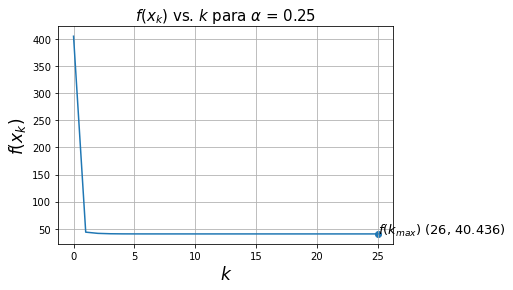

In [378]:
plt.plot(its3, valoresf3)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ para ' +  r'$\alpha$ = ' + f'{alpha[2]}',fontsize=15)
plt.scatter(len(its3)-1, float(f(sol3[len(its3)])))
plt.annotate("$f(k_{max})$ " + f"({len(its3)}, {np.round(float(f(sol3[len(its3)])), 3)})", (len(its3)-1, f(sol3[len(its3)])), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()

Con $\alpha = 0.6$

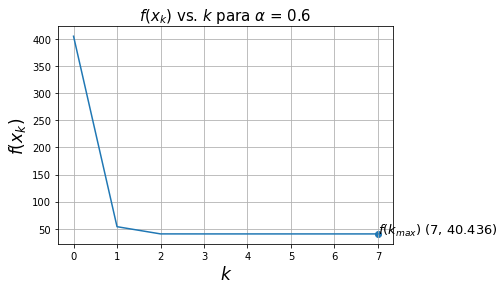

In [379]:
plt.plot(its4, valoresf4)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ para ' +  r'$\alpha$ = ' + f'{alpha[3]}',fontsize=15)
plt.scatter(len(its4)-1, float(f(sol4[len(its4)])))
plt.annotate("$f(k_{max})$ " + f"({len(its4)-1}, {np.round(float(f(sol4[len(its4)])), 3)})", (len(its4)-1, f(sol4[len(its4)])), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()